# The Tools for Data Science: Notebooks and Versioning
# Assignment

## Christoffer Dharma

### Introduction 

This is an analysis of long-term care (LTC) homes COVID-19 data obtained from the Government of Ontario obtained [here](https://data.ontario.ca/dataset/long-term-care-home-covid-19-data/resource/f8c54e4a-62b6-4efa-9ce6-a0de42a3867b). 

Data were collected from August to December 2021. We first calculated the number of LTCs at each PHU and cities. We then found the average 1st and 2nd vaccination rates at each PHU. We identified the PHUs with the highest 1st and 2nd vaccination rates. For the top 5 PHUs with the highest adherence rates for staff vaccination, we graphed the trends from August to December.  The policy has ended but this might have future implications for future policies. LTC patients are at higher risk for severe consequences from COVID-19, so it is important to understand the rates of vaccination among staff. 

#### Loading Data and Data Exploration

In [1]:
import requests

url = "https://data.ontario.ca/dataset/42df36df-04a0-43a9-8ad4-fac5e0e22244/resource/f8c54e4a-62b6-4efa-9ce6-a0de42a3867b/download/ltc_immunization_data.csv"
filename = 'ltc_immunization_data.csv'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)

In [2]:
with open(filename, mode="wb") as file:
    file.write(response.content)

In [3]:
import pandas as pd

df=pd.read_csv("ltc_immunization_data.csv")
df.head()


,Date_Collected,LTC_Home,LTC_Home_Number,City,PHU,1st_dose_percentage_staff_vaccination_rate,2nd_dose_percentage_staff_vaccination_rate
0,2021-08-31,Algoma Manor Nursing Home,3041,Thessalon,ALGOMA,0.92,0.91
1,2021-08-31,Cedarwood Lodge,7093,Sault Ste. Marie,ALGOMA,0.95,0.95
2,2021-08-31,Extendicare Maple View of Sault Ste. Marie,3043,Sault Ste. Marie,ALGOMA,0.74,0.68
3,2021-08-31,Extendicare Van Daele,2609,Sault Ste. Marie,ALGOMA,0.90,0.88
4,2021-08-31,F. J. Davey Home,2936,Sault Ste. Marie,ALGOMA,0.87,0.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Date_Collected                              3091 non-null   object 
 1   LTC_Home                                    3091 non-null   object 
 2   LTC_Home_Number                             3091 non-null   object 
 3   City                                        3091 non-null   object 
 4   PHU                                         3091 non-null   object 
 5   1st_dose_percentage_staff_vaccination_rate  3089 non-null   float64
 6   2nd_dose_percentage_staff_vaccination_rate  3089 non-null   float64
dtypes: float64(2), object(5)
memory usage: 169.2+ KB


#### Summary statistics to calculate mean vaccination dose by PHUs

In [5]:
count_city = df.loc[:,["City","LTC_Home_Number"]].groupby('City').nunique()
count_city
#This is to count number of unique LTC homes at each city

,LTC_Home_Number
City,
Ailsa Craig,1
Ailsa Craig,1
Ajax,2
Akwesasne,1
Alexandria,1
...,...
Woodbridge,4
Woodslee,1
Woodstock,2


In [6]:
count_PHU = df.loc[:,["PHU","LTC_Home_Number"]].groupby('PHU').nunique()
count_PHU.sort_values(by="LTC_Home_Number",ascending=False)
#This is to count number of LTC homes at each PHU

,LTC_Home_Number
PHU,
TORONTO,85
NIAGARA,32
YORK REGION,29
SIMCOE-MUSKOKA,29
PEEL,28
OTTAWA,28
HAMILTON,27
WATERLOO,24
MIDDLESEX-LONDON,23


Toronto has the largest number of LTC homes by far, followed by Niagara and York. We will plot these later. Below is a histogram of the number of LTC counts per PHU

<Axes: xlabel='PHU'>

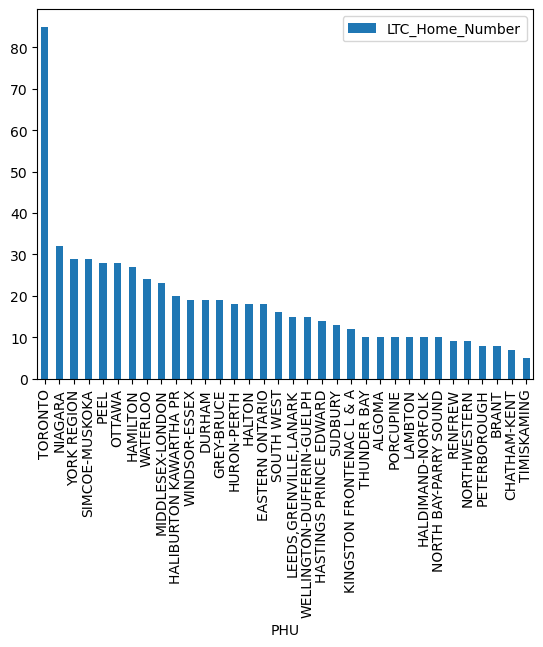

In [7]:
count_PHU.sort_values(by="LTC_Home_Number",ascending=False).plot.bar()


#### Comparing mean doses vaccination rates by PHUs and visualizations

In [8]:
mean_1st_dose=df[["PHU","1st_dose_percentage_staff_vaccination_rate"]].groupby("PHU").mean().sort_values(by="1st_dose_percentage_staff_vaccination_rate",ascending=False)
mean_1st_dose

,1st_dose_percentage_staff_vaccination_rate
PHU,
OTTAWA,0.976857
ALGOMA,0.971633
KINGSTON FRONTENAC L & A,0.971500
YORK REGION,0.971151
TORONTO,0.969928
SIMCOE-MUSKOKA,0.968873
PETERBOROUGH,0.968500
WATERLOO,0.968205
PEEL,0.967391


In [9]:
mean_2nd_dose=df[["PHU","2nd_dose_percentage_staff_vaccination_rate"]].groupby("PHU").mean().sort_values(by="2nd_dose_percentage_staff_vaccination_rate",ascending=False)
mean_2nd_dose

,2nd_dose_percentage_staff_vaccination_rate
PHU,
OTTAWA,0.961929
YORK REGION,0.957266
ALGOMA,0.956735
TORONTO,0.954988
KINGSTON FRONTENAC L & A,0.952333
WATERLOO,0.951880
SIMCOE-MUSKOKA,0.949930
HURON-PERTH,0.948000
HALTON,0.947500


In [10]:
#Want to see the difference in rates of vaccination between dose 1 and dose 2, which PHU has the largest differnece?
df['diff'] = df['1st_dose_percentage_staff_vaccination_rate'] - df['2nd_dose_percentage_staff_vaccination_rate']
mean_diff=df[["PHU","diff"]].groupby("PHU").mean().sort_values(by="diff",ascending=False)
mean_diff

,diff
PHU,
TIMISKAMING,0.037200
NORTHWESTERN,0.032000
PEEL,0.031159
HALDIMAND-NORFOLK,0.030000
LAMBTON,0.027347
WELLINGTON-DUFFERIN-GUELPH,0.026761
CHATHAM-KENT,0.025143
HASTINGS PRINCE EDWARD,0.024571
HAMILTON,0.023258


The larger PHUs such as Toronto has some of the smallest difference, differences only range between 1% to 3%

#### Visualizing the vaccination rates over time in the 3 largest PHUs

In [11]:
#To plot, we will pick the top 3 largest PHUs with the highest number of LTCs.
#Perform data cleaning to convert date 
top3 = df[df["PHU"].isin(['TORONTO','YORK REGION','NIAGARA'])].loc[:,["PHU","Date_Collected","1st_dose_percentage_staff_vaccination_rate","2nd_dose_percentage_staff_vaccination_rate"]]
top3['Date_Collected']=pd.to_datetime(top3['Date_Collected'])

In [12]:
#To plot changes, need to average them 
avg_1st_dose = top3.groupby(['PHU', 'Date_Collected'])['1st_dose_percentage_staff_vaccination_rate'].mean().reset_index()
avg_1st_dose

,PHU,Date_Collected,1st_dose_percentage_staff_vaccination_rate
0,NIAGARA,2021-08-31,0.876563
1,NIAGARA,2021-09-30,0.931250
2,NIAGARA,2021-10-31,0.977187
3,NIAGARA,2021-11-30,0.996452
4,NIAGARA,2021-12-31,0.999677
5,TORONTO,2021-08-31,0.916706
6,TORONTO,2021-09-30,0.953810
7,TORONTO,2021-10-31,0.986310
8,TORONTO,2021-11-30,0.997229
9,TORONTO,2021-12-31,0.998228


PHU
NIAGARA        Axes(0.125,0.11;0.775x0.77)
TORONTO        Axes(0.125,0.11;0.775x0.77)
YORK REGION    Axes(0.125,0.11;0.775x0.77)
Name: 1st_dose_percentage_staff_vaccination_rate, dtype: object

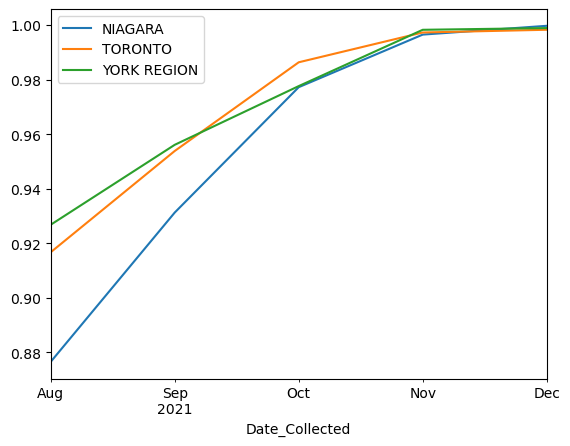

In [13]:
#Rate keeps increasing over time
avg_1st_dose.set_index('Date_Collected', inplace=True)
avg_1st_dose.groupby('PHU')['1st_dose_percentage_staff_vaccination_rate'].plot(legend=True)


In [14]:
avg_2nd_dose = top3.groupby(['PHU', 'Date_Collected'])['2nd_dose_percentage_staff_vaccination_rate'].mean().reset_index()
avg_2nd_dose

,PHU,Date_Collected,2nd_dose_percentage_staff_vaccination_rate
0,NIAGARA,2021-08-31,0.829688
1,NIAGARA,2021-09-30,0.893437
2,NIAGARA,2021-10-31,0.954688
3,NIAGARA,2021-11-30,0.989355
4,NIAGARA,2021-12-31,0.999355
5,TORONTO,2021-08-31,0.895059
6,TORONTO,2021-09-30,0.927738
7,TORONTO,2021-10-31,0.967024
8,TORONTO,2021-11-30,0.991205
9,TORONTO,2021-12-31,0.997595


PHU
NIAGARA        Axes(0.125,0.11;0.775x0.77)
TORONTO        Axes(0.125,0.11;0.775x0.77)
YORK REGION    Axes(0.125,0.11;0.775x0.77)
Name: 2nd_dose_percentage_staff_vaccination_rate, dtype: object

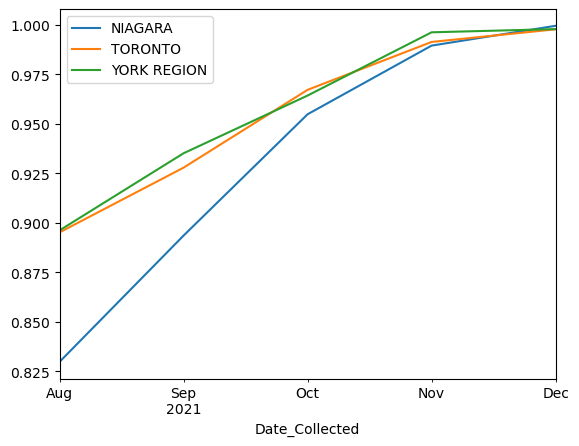

In [15]:
avg_2nd_dose.set_index('Date_Collected', inplace=True)
avg_2nd_dose.groupby('PHU')['2nd_dose_percentage_staff_vaccination_rate'].plot(legend=True)

Overall, rate keeps increasing over time between August to December; second dose started much lower compared to first dose, which is expected.